In [8]:
library(mboost)
library(survival)
library(tram)
library(tbm)

In [3]:
X       = as.matrix(read.table('https://raw.githubusercontent.com/avinashbarnwal/aftXgboostPaper/master/Data/MRE_DATA/ATAC_JV_adipose_FOLD1_X.csv?token=ABOH22KJ4S242JLJJA3USYC5U2OVC',header=TRUE,sep=","))
y.lower = as.matrix(read.table('https://raw.githubusercontent.com/avinashbarnwal/aftXgboostPaper/master/Data/MRE_DATA/ATAC_JV_adipose_FOLD1_y.lower.csv?token=ABOH22MQO7CZINMWDKPQ3M25U2OYO',header=TRUE,sep=","))
y.upper = as.matrix(read.table('https://raw.githubusercontent.com/avinashbarnwal/aftXgboostPaper/master/Data/MRE_DATA/ATAC_JV_adipose_FOLD1_y.upper.csv?token=ABOH22IVY34N6VQ7YDLUASC5U2OZU',header=TRUE,sep=","))

In [4]:
colnames(y.lower) = NULL
colnames(y.upper) = NULL
rownames(y.lower) = NULL
rownames(y.upper) = NULL

In [5]:
my.surv   = Surv(y.lower,y.upper,type='interval2')
formula   = as.formula(paste("my.surv ~", paste(colnames(X),collapse="+")))
trn.data  = data.frame(X,y.lower,y.upper)

### With STM - Mboost/BlackBoost (Additive Smooth Models)
trn.data$y.lower = trn.data$y.upper = NULL

In [9]:
trn.data$my.surv = my.surv
m_mlt            = Survreg(formula, data = trn.data, dist = "lognormal")
bm               = stmboost(m_mlt, formula = formula, data = trn.data,control = boost_control(mstop=200,nu=0.01,trace=TRUE),method = quote(mboost::mboost))

[   1] ...................................... -- risk: 406.2255 
[  41] ...................................... -- risk: 404.2877 
[  81] ...................................... -- risk: 402.7031 
[ 121] ...................................... -- risk: 401.3805 
[ 161] ......................................
Final risk: 400.2561 


Warning message in c.basis(bresponse = response, bshifting = shifting):
“more than one basis contains an intercept term”


'log Lik.' -407.8067 (df=29)

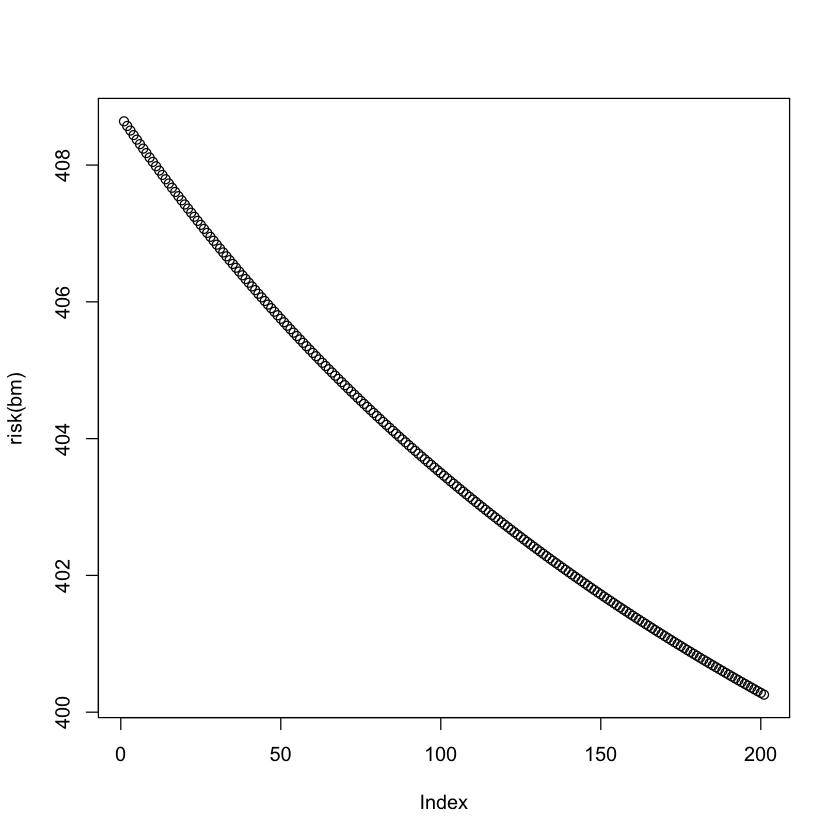

In [10]:
### look at in-sample performance
logLik(m_mlt)
plot(risk(bm)) ### this is the negative log-lik

In [11]:
### set-up some quantiles
q = seq(from = 0, to = max(trn.data$my.surv[,1]), length.out = 100)

In [12]:
### compute conditional density
d = predict(bm, newdata = trn.data[1:10,], type = "density", q = q)
### NOTE: obs are in columns, not rows!

ERROR: Error in .const_array(dim, nd, lp): length(x) == prod(dim[subdim]) is not TRUE


In [13]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Sierra 10.12.6

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] tbm_0.3-1         tram_0.2-6        mlt_1.0-6         basefun_1.0-5    
[5] variables_1.0-2   survival_2.44-1.1 mboost_2.9-1      stabs_0.6-3      

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.2          pillar_1.4.2        compiler_3.6.1     
 [4] base64enc_0.1-3     tools_3.6.1         partykit_1.2-5     
 [7] rpart_4.1-15        digest_0.6.20       uuid_0.1-2         
[10] jsonlite_1.6        evaluate_0.14       lattice_0.20-38    
[13] rlang_0.4.0         M